<a href="https://colab.research.google.com/github/raviteja-padala/NLP/blob/main/Analysing_Drug_review_data/Prediction_of_patient's_condition_based_on_the_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of patient's condition based on the review

## Objective:
The objective of this notebook is to predict a patient's medical condition based on the reviews they provide. This task involves text classification, where we aim to classify patient reviews into specific medical conditions.

## Description:
The dataset contains patient reviews and their corresponding medical conditions. Our goal is to build and evaluate machine learning models that can accurately predict a patient's condition based on the text of their review.

# Import Libraries and Dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

# Download the Drug Review dataset in ZIP format from the UCI Machine Learning Repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2023-10-09 12:18:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip.2’

drugsCom_raw.zip.2      [          <=>       ]  41.00M  19.8MB/s    in 2.1s    

2023-10-09 12:18:59 (19.8 MB/s) - ‘drugsCom_raw.zip.2’ saved [42989872]



In [ ]:
# Unzip the downloaded ZIP archive file (drug review dataset)
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Display the first 5 lines of the 'drugsComTrain_raw.tsv' file
!head -n5 drugsComTrain_raw.tsv

	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."""	8.0	April 27, 2010	192
92703	Lyb

In [ ]:
# Read the training dataset from 'drugsComTrain_raw.tsv' into df_train
# Read the testing dataset from 'drugsComTest_raw.tsv' into df_test
df_train = pd.read_table('drugsComTrain_raw.tsv')
df_test = pd.read_table('drugsComTest_raw.tsv')

# Concatenate the training and testing DataFrames vertically (along axis 0) into df_main
df_main = pd.concat([df_train, df_test], axis=0)

# Display the first few rows of the concatenated DataFrame df_main
df_main.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
# drop unnamed column
df_main.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
#shape of the dataset
df_main.shape

(215063, 6)

In [ ]:
#info of the dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    213869 non-null  object 
 2   review       215063 non-null  object 
 3   rating       215063 non-null  float64
 4   date         215063 non-null  object 
 5   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.5+ MB


In [ ]:
# unique conditions in the dataset
df_main['condition'].nunique()

916

## Select Certain Conditions:

There are 916 different conditions in the dataset, we will Choose specific medical conditions from the dataset to perform the classification task. This step involves data selection and filtering.

In [ ]:
# creating a dataset with required conditions for classification
df = df_main[(df_main['condition']=='Birth Control') | (df_main['condition']=='Depression') | (df_main['condition']=='High Blood Pressure')  | (df_main['condition']=='Diabetes, Type 2')]

In [ ]:
# finding unique counts
df['condition'].value_counts()

Birth Control          38436
Depression             12164
Diabetes, Type 2        3362
High Blood Pressure     3104
Name: condition, dtype: int64

In [ ]:
#retaining only required columns for classification
df.drop(['drugName','rating','date','usefulCount'],axis=1, inplace=True)

<ipython-input-13-6e190705785a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['drugName','rating','date','usefulCount'],axis=1, inplace=True)


In [ ]:
df

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."
...,...,...
53732,Depression,"""I&#039;m a 19 year old girl and I&#039;ve bee..."
53741,Birth Control,"""I first would like to thank all of you that p..."
53759,Birth Control,"""I was on Microgestin for about 3 years. Over ..."
53760,Birth Control,"""I started taking Apri about 7 months ago. My ..."


In [ ]:
# checking if the data contains any NULL values
df.isnull().sum()

condition    0
review       0
dtype: int64

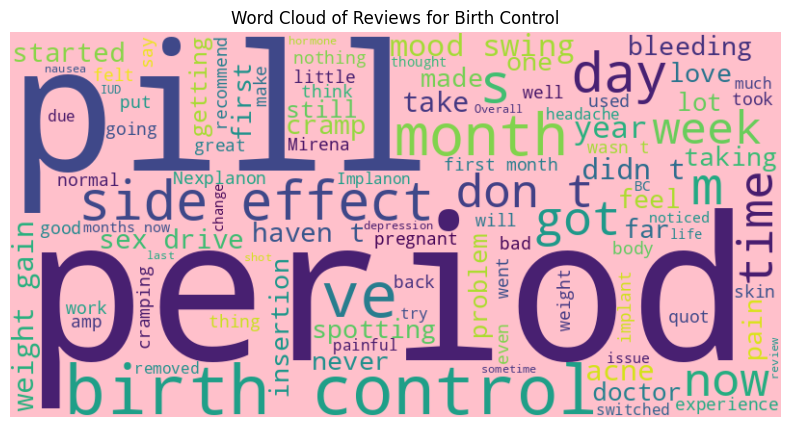

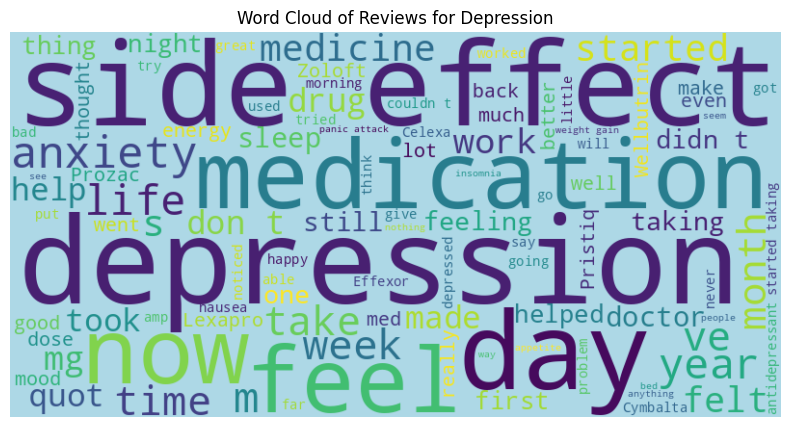

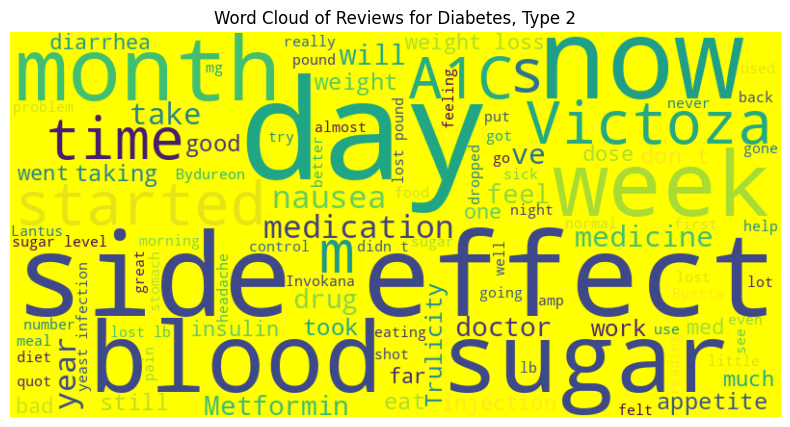

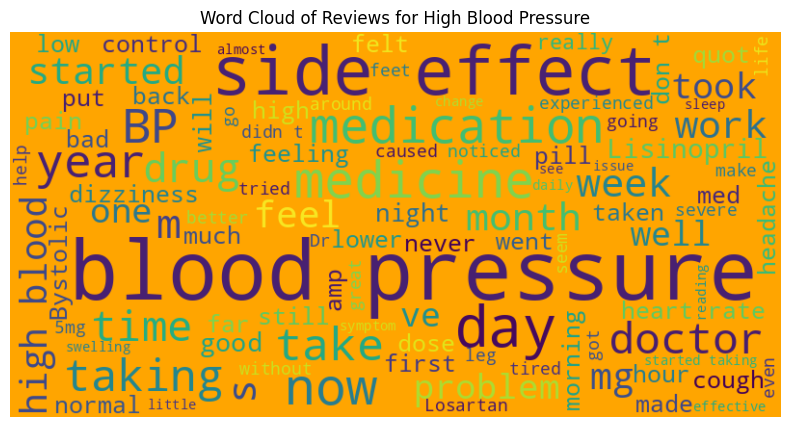

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a dictionary to map conditions to background colors
condition_colors = {
    'Birth Control': 'pink',
    'Depression': 'lightblue',
    'Diabetes, Type 2': 'yellow',
    'High Blood Pressure': 'orange'
}

# Group the reviews by condition and concatenate them into a single string
condition_reviews = df.groupby('condition')['review'].apply(' '.join)

# Create a WordCloud for each condition with custom background color
for condition, reviews in condition_reviews.items():
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color=condition_colors.get(condition, 'white'),  # Get the background color for the condition
        max_words=100,
        colormap='viridis',
        contour_color='steelblue',
        contour_width=2,
        relative_scaling=0.5,
        random_state=42
    ).generate(reviews)

    # Display the word cloud
    plt.figure(figsize=(14, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Reviews for {condition}')
    plt.show()


## Text preprocessing

In [ ]:
#importing required libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags (e.g., &#039;)
    text = re.sub(r'&#\d+;', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text into words
    words = word_tokenize(text)

    # Convert words to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [ ]:
# Preprocess each review
# preprocessed_reviews = [preprocess_text(review) for review in reviews]
df['cleaned_reviews'] = df['review'].apply(preprocess_text)

<ipython-input-17-2d308fa23de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews'] = df['review'].apply(preprocess_text)


In [ ]:
# verifying
df.head()

,condition,review,cleaned_reviews
2,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...
3,Birth Control,"""This is my first time using any form of birth...",first time using form birth control im glad we...
9,Birth Control,"""I had been on the pill for many years. When m...",pill many years doctor changed rx chateal effe...
11,Depression,"""I have taken anti-depressants for years, with...",taken antidepressants years improvement mostly...
14,Birth Control,"""Started Nexplanon 2 months ago because I have...",started nexplanon 2 months ago minimal amount ...


## Train test split

In [ ]:
# Extract the preprocessed reviews as the feature (X) and the conditions as the target (y).
X = df['cleaned_reviews']  # X contains the preprocessed reviews.
y = df['condition']        # y contains the corresponding medical conditions.

# Print the shape of X and y to check the dimensions.
print(f"{X.shape=}")  # Display the shape (number of samples, number of features) of X.
print(f"{y.shape=}")  # Display the shape (number of samples) of y.

X.shape=(57066,)
y.shape=(57066,)


In [ ]:
# train - test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
# X_train: Features for the training set
# X_test: Features for the testing set
# y_train: Target labels for the training set
# y_test: Target labels for the testing set
# test_size: Specifies the proportion of the dataset to include in the testing set (here, 20%)
# random_state: Sets a seed for the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(45652,)
y_train.shape=(45652,)
X_test.shape=(11414,)
y_test.shape=(11414,)


In [ ]:
# Import the CountVectorizer class from scikit-learn's feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of the CountVectorizer class
cv = CountVectorizer()

In [ ]:
# Transform the training text data (X_train) into a bag-of-words (BoW) representation and convert it to a NumPy array
X_train_bow = cv.fit_transform(X_train).toarray()

# Transform the testing text data (X_test) into a BoW representation using the same vocabulary as the training data and convert it to a NumPy array
X_test_bow = cv.transform(X_test).toarray()

In [ ]:
print(f"{X_train_bow.shape=}")

print(f"{X_test_bow.shape=}")

X_train_bow.shape=(45652, 29140)
X_test_bow.shape=(11414, 29140)


## Building model with MultinomialNB

In [ ]:
# Import the MultinomialNB class from scikit-learn's naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB classifier
mnb = MultinomialNB()

# Fit the Multinomial Naive Bayes classifier to the training data
mnb.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# Predicting the labels for the test set using the trained MNB classifier
y_pred = mnb.predict(X_test_bow)

# Importing necessary metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculating and printing the accuracy score
print("Accuracy score =", accuracy_score(y_test, y_pred))

# Importing the classification_report for a detailed classification summary
from sklearn.metrics import classification_report

# Printing the classification report
print(classification_report(y_test,y_pred))

Accuracy score = 0.9734536534080953
                     precision    recall  f1-score   support

      Birth Control       0.99      0.99      0.99      7696
         Depression       0.94      0.97      0.95      2428
   Diabetes, Type 2       0.97      0.91      0.94       689
High Blood Pressure       0.91      0.86      0.88       601

           accuracy                           0.97     11414
          macro avg       0.95      0.93      0.94     11414
       weighted avg       0.97      0.97      0.97     11414



## Building model with RandomForestClassifier

In [ ]:
## building model with Randomforest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train_bow,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test_bow)
print("Accuracy score=",accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy score= 0.9813387068512354
                     precision    recall  f1-score   support

      Birth Control       0.99      1.00      0.99      7696
         Depression       0.96      0.98      0.97      2428
   Diabetes, Type 2       0.98      0.94      0.96       689
High Blood Pressure       0.98      0.82      0.89       601

           accuracy                           0.98     11414
          macro avg       0.98      0.94      0.95     11414
       weighted avg       0.98      0.98      0.98     11414



# TF-IDF

In [ ]:
# Importing the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TfidfVectorizer object with specified parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Transforming the training data into TF-IDF vectors
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transforming the test data into TF-IDF vectors
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# building model with GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(tfidf_train,y_train)

MultinomialNB()

In [ ]:
#predicting from model
y_pred_tfidf = mnb.predict(tfidf_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score=",accuracy_score(y_test,y_pred_tfidf))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tfidf))

Accuracy score= 0.918783949535658
                     precision    recall  f1-score   support

      Birth Control       0.91      1.00      0.95      7696
         Depression       0.92      0.89      0.91      2428
   Diabetes, Type 2       0.99      0.55      0.71       689
High Blood Pressure       1.00      0.41      0.58       601

           accuracy                           0.92     11414
          macro avg       0.96      0.71      0.79     11414
       weighted avg       0.92      0.92      0.91     11414



In [ ]:
## building model with Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(tfidf_train,y_train)

RandomForestClassifier()

In [ ]:
#predicting from model
y_pred_tfidf = rf.predict(tfidf_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score=",accuracy_score(y_test,y_pred_tfidf))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tfidf))

Accuracy score= 0.9817767653758542
                     precision    recall  f1-score   support

      Birth Control       0.99      1.00      0.99      7696
         Depression       0.96      0.98      0.97      2428
   Diabetes, Type 2       0.99      0.93      0.96       689
High Blood Pressure       0.98      0.84      0.90       601

           accuracy                           0.98     11414
          macro avg       0.98      0.94      0.96     11414
       weighted avg       0.98      0.98      0.98     11414



# TF-IDF Bigrams

In [ ]:
# Creating a TfidfVectorizer object with specified parameters for bi grams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))

# Transform the training data with the new TfidfVectorizer configuration
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Transform the test data using the same vectorizer
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [ ]:
# building model with GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(tfidf_train_2,y_train)

MultinomialNB()

In [ ]:
#predicting from model
y_pred_tfidf_2 = mnb.predict(tfidf_test_2)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score=",accuracy_score(y_test,y_pred_tfidf_2))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tfidf_2))

Accuracy score= 0.8239880848081303
                     precision    recall  f1-score   support

      Birth Control       0.80      1.00      0.89      7696
         Depression       0.98      0.66      0.79      2428
   Diabetes, Type 2       1.00      0.10      0.17       689
High Blood Pressure       1.00      0.05      0.10       601

           accuracy                           0.82     11414
          macro avg       0.94      0.45      0.49     11414
       weighted avg       0.86      0.82      0.78     11414



In [ ]:
## building model with Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(tfidf_train_2,y_train)

RandomForestClassifier()

In [ ]:
#predicting from model
y_pred_tfidf_2 = rf.predict(tfidf_test_2)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score=",accuracy_score(y_test,y_pred_tfidf_2))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tfidf_2))

Accuracy score= 0.9770457333099702
                     precision    recall  f1-score   support

      Birth Control       0.98      1.00      0.99      7696
         Depression       0.96      0.98      0.97      2428
   Diabetes, Type 2       0.99      0.90      0.95       689
High Blood Pressure       0.99      0.78      0.87       601

           accuracy                           0.98     11414
          macro avg       0.98      0.92      0.94     11414
       weighted avg       0.98      0.98      0.98     11414



# Predictions

In [ ]:
# Import the CountVectorizer class from scikit-learn's feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of the CountVectorizer class
cv = CountVectorizer()

# Fit and transform X_train to create the BoW representation
X_train_bow = cv.fit_transform(X_train).toarray()

In [ ]:
sample1 = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]

# Transform the sample1 text using the same CountVectorizer instance
sample1_bow = cv.transform(sample1)

# Now, you can proceed with prediction
prediction1 = rfc.predict(sample1_bow)[0]
print(prediction1)

High Blood Pressure


In [ ]:
sample2 = ["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]

# Transform the sample1 text using the same CountVectorizer instance
sample2_bow = cv.transform(sample2)

# Now, you can proceed with prediction
prediction2 = rfc.predict(sample2_bow)[0]
print(prediction2)

Diabetes, Type 2


In [ ]:
sample3 = [" I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is.. I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile."]

# Transform the sample1 text using the same CountVectorizer instance
sample3_bow = cv.transform(sample3)

# Now, you can proceed with prediction
prediction3 = rfc.predict(sample3_bow)[0]
print(prediction3)


Birth Control


In [ ]:
sample4= ["After being suicidal for many months and self harming in addition to extreme anxiety. I had taken Prozac  6 years earlier and didn&#039;t work at all has NOW almost eliminated my depression. I feel happier than I have in years. The only downside is I have gained about 20 lbs. My lowest weight was 133, considered healthy for someone 5&#039;7 and athletic, but despite my clean eating and exercise I&#039;ve blown up to 163 lbs in 2 years and nothing seems to get the weight off. This has been my only negative side effect. I choose my mental health over my body image although I also have an eating disorder BDD."]

# Transform the sample1 text using the same CountVectorizer instance
sample4_bow = cv.transform(sample4)

# Now, you can proceed with prediction
prediction4 = rfc.predict(sample4_bow)[0]
print(prediction4)


Depression


## Summary:
This notebook focuses on text classification to predict a patient's medical condition from their provided reviews. Various preprocessing techniques and vectorization methods, including Count Vectorization and TF-IDF, are explored. Multiple classification models, including Multinomial Naive Bayes and Random Forest Classifier, are trained and evaluated to identify the best-performing model for this task. The Random Forest Classifier with Count Vectorization is found to achieve the highest accuracy score.

## Conclusion:
Through this analysis, we have successfully built and evaluated machine learning models for predicting patient conditions based on their reviews. The choice of vectorization method and model selection plays a crucial role in achieving accurate predictions. The Random Forest Classifier, in combination with Count Vectorization, demonstrated the best performance in this text classification task. This work can be extended to real-world healthcare applications for automating the analysis of patient feedback and reviews.